# Projeto De Sistemas Inteligentes: MLP
> Grupo: Rafael dos Reis de Labio (rrl3), Pedro César Guimarães Rodrigues (pcgr),Lucas Gabriel Ferreira Lima (lgfl),Vinícius Pereira de Araujo (vpa2),João Pedro Barreto de Oliveira Lima (jpbol)



# 🧐 Objetivos:
No projeto apresentado, tem-se como objetivo ultilizar um multilayer perceptron (MLP) em um conjunto de dados sobre Lombalgia com o objetivo de reconhecer pessoas que possuem a doença através de dados físicos da sua coluna vertebral.

# Montando o google Drive No Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📖Import das bibliotecas:

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from math import ceil

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10

# 👩‍💻Import dos dados e 👀 verificação dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_spine.csv')
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

# 🤔 Analisando o DataSet
Esses valores representam

1. "*Pelvic Incidence*": Ângulo de inclinação da pelve, indicando postura.
2. "*Pelvic Tilt*": Inclinação pélvica em relação à linha horizontal.
3. "*Lumbar Lordosis Angle*": Curvatura natural da região lombar.
4. "*Sacral Slope*": Inclinação da parte inferior da coluna vertebral.
5. "*Pelvic Radius*": Curvatura da pelve.
6. "*Spondylolisthesis Grade*": Deslocamento de vértebra.
7. "*Pelvic Slope*": Inclinação da pelve.
8. "*Direct Tilt*": Inclinação frontal da pelve.
9. "*Thoracic Slope*": Inclinação da parte superior das costas.
10. "*Cervical Tilt*": Inclinação da região do pescoço.
11. "*Sacrum Angle*": Inclinação da região sacral da coluna.
12. "*Scoliosis Slope*": Inclinação da curvatura lateral da coluna.
13. "*Outcome*": Indica "Normal" ou "Anormal" com base na avaliação clínica.

# 🧹Limpeza do DataSet
Nesse conjunto, verifica-se a presença de uma coluna com o nome "Unnamed: 13" que não passa nenhum tipo de informação. Por isso, vamos retirá-la do dataset para que não nos atrapalhe

In [ ]:
df = df.drop(['Unnamed: 13'], axis=1)
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal  
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal  
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal  
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal

In [ ]:
mask = df['Class_att'] == 'Abnormal'
abnormal_df = df[mask]
normal_df = df[~mask]
normal_df = pd.concat([normal_df] * 2, ignore_index=True)
df= pd.concat([normal_df,abnormal_df], ignore_index=True)

Com objetivo de melhor balançear os dados, o dataset de imagens normais foi duplicado antes de ser dividido entre validation e training sets, dessa forma acabamos ficando com 200 imagens abnormal e 210 normal

In [ ]:
abnormal_df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    64.692562   19.791111   55.925370   44.901450  115.077713   37.777705   
std     17.662129   10.515871   19.669471   14.515560   14.090605   40.696741   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -10.675871   
25%     50.102507   13.048130   41.116964   34.380345  107.309280    7.263227   
50%     65.274888   18.798899   56.150000   44.639597  115.650323   31.946516   
75%     77.593672   24.815515   68.102805   55.146868  123.133365   55.371614   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000  
mean     0.483979   21.085875   12.948913   12.132737  -13.826677   25.146915  
std      0.286319    8.550365    3.516762    2.848401   12.029824   10.242513  
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900  
25%      0.250212   13.054400   10.151175    9.801870  -23.732086   16.900900  
50%      0.501280   21.750600   12.770050   11.973735  -14.892070   24.509400  
75%      0.708476   28.194975   15.950475   14.609660   -2.937705   33.204375  
max      0.998827   36.743900   19.324000   16.821080    6.868423   44.233800

Agora, descrevendo algumas estatísticas do grupo classicado como "Anormal", como a média dos valores de cada coluna.

In [ ]:
normal_df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    51.685244   12.821414   43.542605   38.863830  123.890834    2.186572   
std     12.337047    6.761450   12.330290    9.599792    8.991568    6.291615   
min     30.741938   -5.845994   19.071075   17.386972  100.501192  -11.058179   
25%     42.817849    8.799951   35.000000   32.340487  118.182659   -1.511360   
50%     50.123115   13.482435   42.638923   37.059694  123.874328    1.152710   
75%     61.470097   16.785953   51.602346   44.608788  129.040401    4.968807   
max     89.834676   29.894119   90.563461   67.195460  147.894637   31.172767   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     0.449880   21.816394   13.307268   11.514534  -14.528712   26.694019  
std      0.283995    8.824229    3.134996    2.948548   12.643337   10.824799  
min      0.005045    7.390700    7.475200    7.054110  -35.077537    7.432400  
25%      0.201843   13.164225   11.053625    8.706198  -26.789617   17.838050  
50%      0.418732   22.414600   13.409750   11.330750  -13.974694   27.727950  
75%      0.695981   29.760625   15.568925   13.816777   -4.488790   35.660300  
max      0.997247   36.619400   19.265900   16.617540    6.972071   44.341200

E fazemos o mesmo para os classificados como "Normal"

# ✂️ Separando nosso dataset em um set de treino e um set de teste


Com esse conjunto de dados, vamos separar o X (atributos) e o y (labels) e dividi-lo em conjunto de treino e de teste com uma proporção de 70/30, ou seja, 70% dos dados disponíveis serão usados no treino do MLP e os outros 30% para testar o modelo

In [ ]:
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

# 🏋️ Treinando Rede MLP com parâmetros padrões

Agora, vamos criar o modelo usando a biblioteca SKLearn. Para um primeiro teste, usaremos os parâmetros que estão como padrão na implementação que são dados abaixo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 🏋️ Treinando o Modelo

In [ ]:
clf_default = MLPClassifier(random_state = 13, verbose = True)
clf_default.fit(X_train, y_train)

Iteration 1, loss = 16.13317024
Iteration 2, loss = 13.80861591
Iteration 3, loss = 10.82277948
Iteration 4, loss = 7.66560999
Iteration 5, loss = 5.69024585
Iteration 6, loss = 5.05908407
Iteration 7, loss = 5.47561626
Iteration 8, loss = 5.56958111
Iteration 9, loss = 4.77718154
Iteration 10, loss = 3.46953359
Iteration 11, loss = 2.45323405
Iteration 12, loss = 2.17019659
Iteration 13, loss = 2.27815959
Iteration 14, loss = 2.11057816
Iteration 15, loss = 1.62399373
Iteration 16, loss = 1.19987616
Iteration 17, loss = 1.08157480
Iteration 18, loss = 1.18005596
Iteration 19, loss = 1.15141548
Iteration 20, loss = 0.98494420
Iteration 21, loss = 0.86840360
Iteration 22, loss = 0.85868866
Iteration 23, loss = 0.88283735
Iteration 24, loss = 0.84020440
Iteration 25, loss = 0.76162511
Iteration 26, loss = 0.72032872
Iteration 27, loss = 0.73750344
Iteration 28, loss = 0.72741087
Iteration 29, loss = 0.68862461
Iteration 30, loss = 0.65296980
Iteration 31, loss = 0.64956610
Iteration 32, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=13, verbose=True)

# 🤔 Analisando o Classification Report do modelo


In [ ]:
y_pred = clf_default.predict(X_test)

Com tais parâmetros, vamos treinar o modelo usando o nosso X_test e y_test

In [ ]:
y_pred = clf_default.predict(X_test)
clf_default.score(X_test, y_test)

0.8536585365853658

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    Abnormal       0.83      0.86      0.84        56
      Normal       0.88      0.85      0.86        67

    accuracy                           0.85       123
   macro avg       0.85      0.85      0.85       123
weighted avg       0.85      0.85      0.85       123



Com esses parâmetros, obtemos uma acurácia de 83%. Além disso, podemos tirar mais alguns dados do classification report que calculamos:

Precisão (porcentagem dos classificados como X que eram realmente X)
Aqui, tivemos 83% para abnormal e 88% para normal.

Recall (quando realmente é da classe X, o quão frequente você classifica como X)
Obtemos 8%6 para abnormal e 85% para normal. Dessa forma, 12% das pessoas saudáveis foram erroneamente classificadas como doentes. Essa taxa aumenta para 17% no caso dos doentes classificados como normais.

# 🧐 Analisando a matriz de confusão do modelo

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred)
print(cf_matrix_nb)

[[48  8]
 [10 57]]


<Axes: >

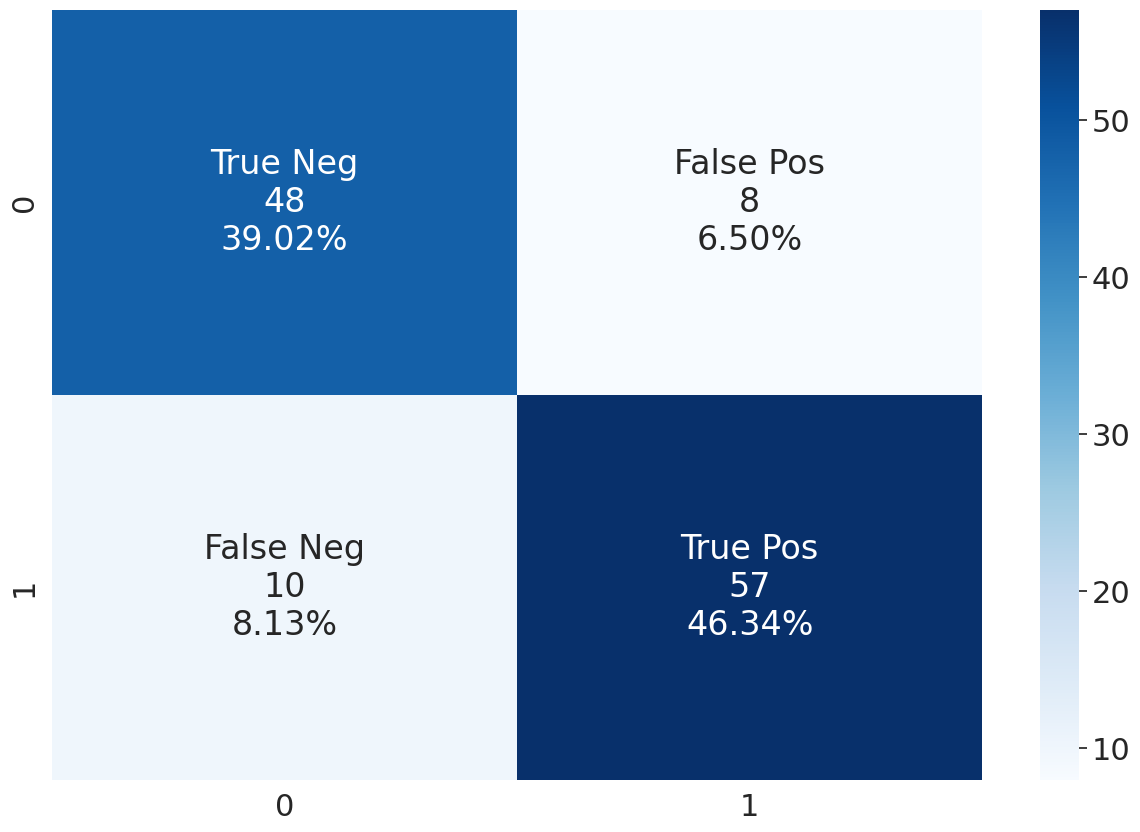

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_nb.flatten() / np.sum(cf_matrix_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 2)
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

# 📊 Análise exploratória

<ipython-input-52-20755cdb6ffc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot=True)


<Axes: >

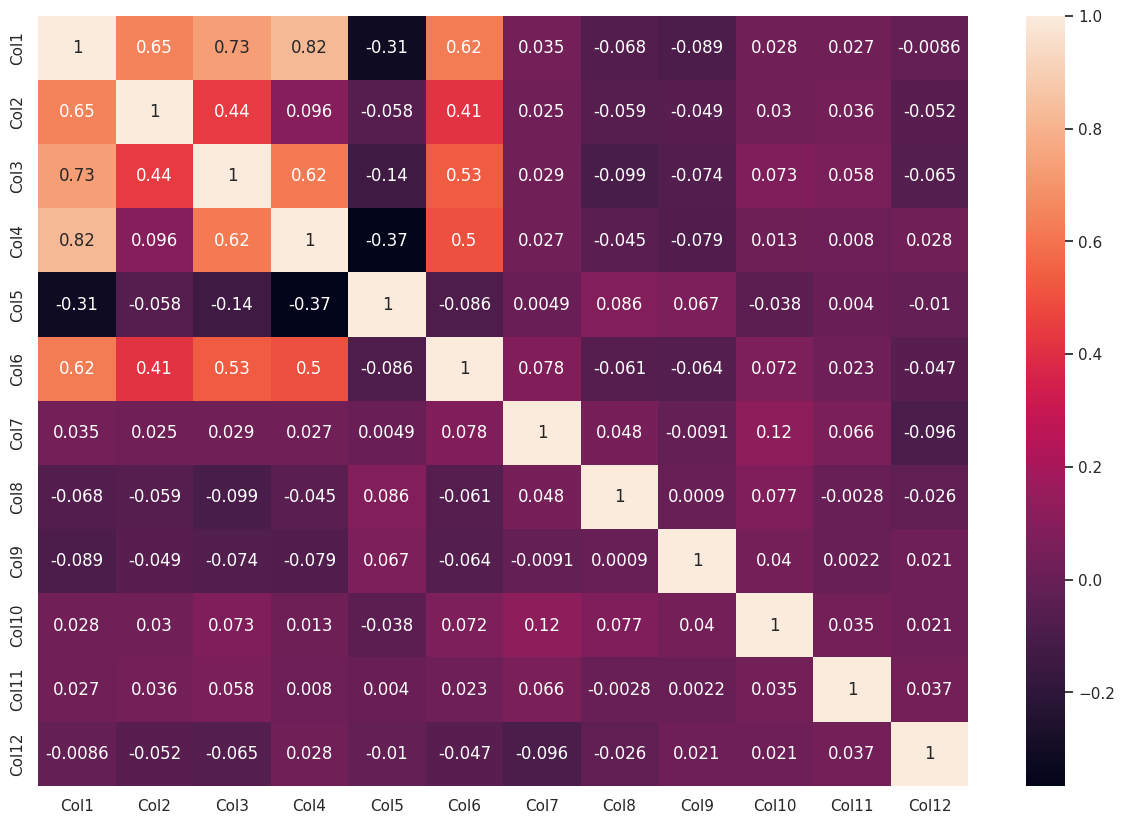

In [ ]:
sns.set(font_scale= 1)
sns.heatmap(data = df.corr(), annot=True)

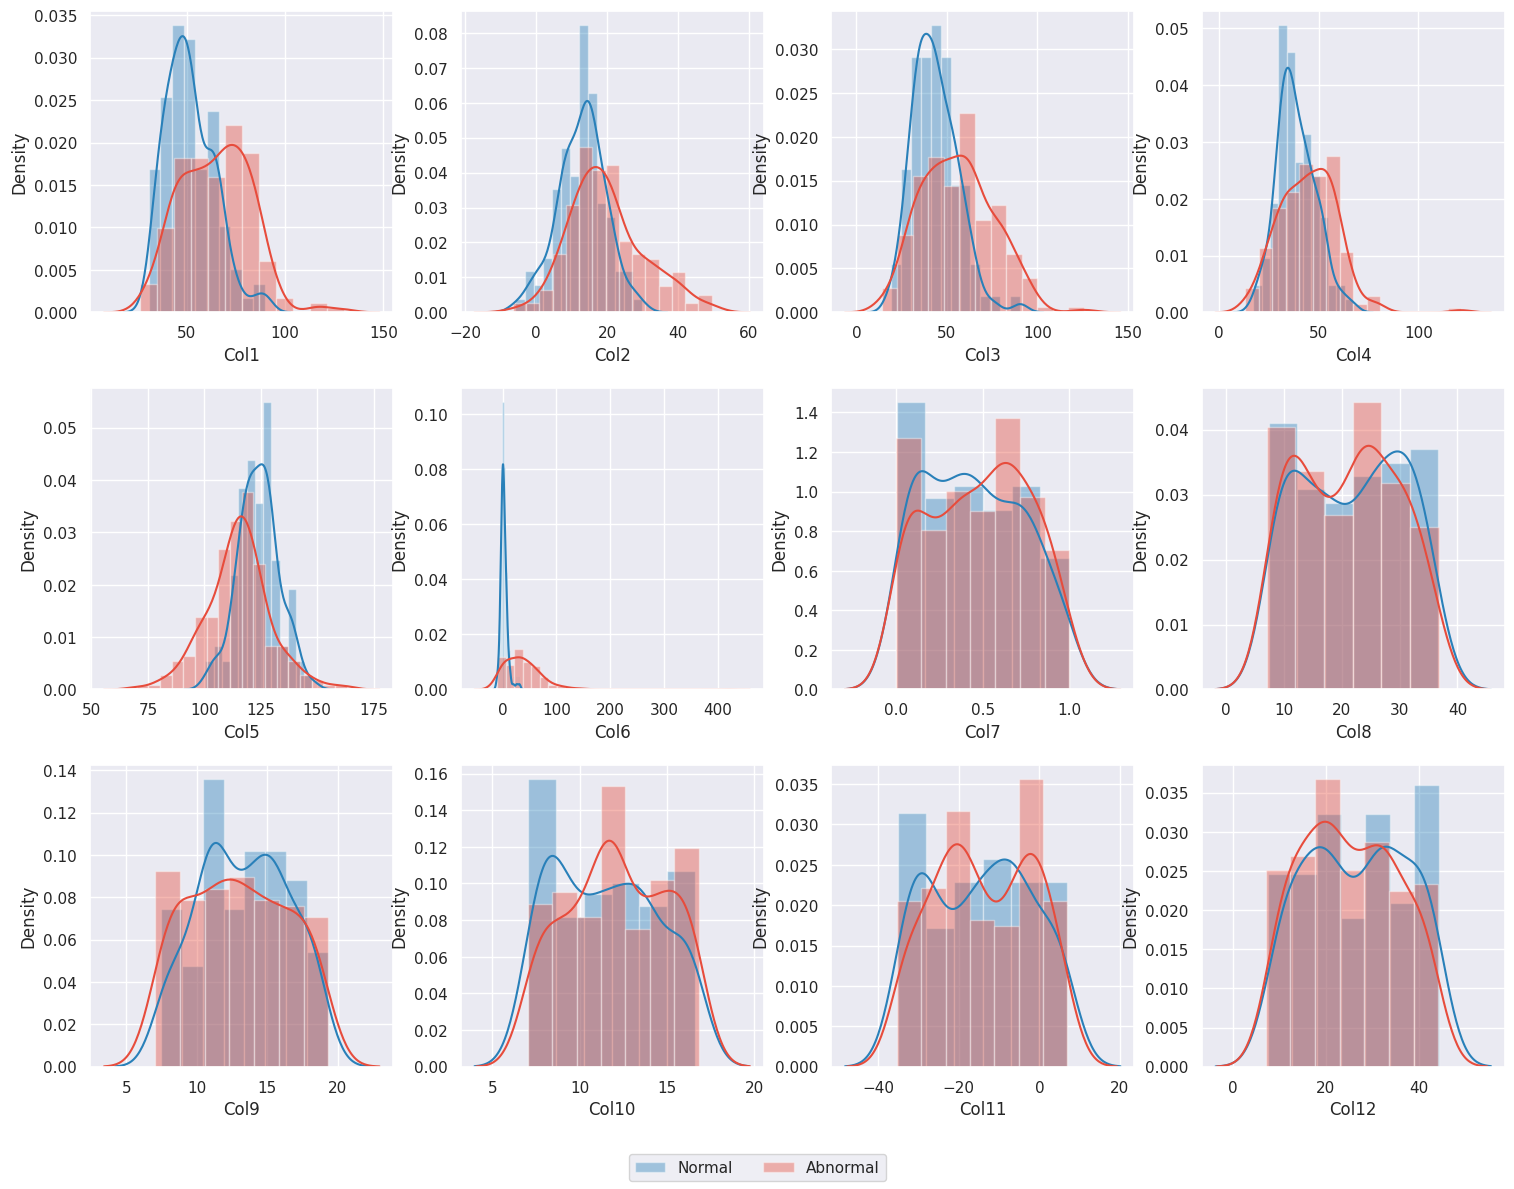

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fg, ax = plt.subplots(ncols=4, nrows=3, sharex=False, sharey=False, figsize=(15,12))
fg.tight_layout()

plt.subplots_adjust(hspace=0.25, bottom = 0.1)

for index, axes in enumerate(ax.reshape(-1)):
    normal = sns.distplot(df[df.Class_att == 'Normal'].iloc[:, index], ax=axes, color='#2980b9', label = 'Normal')
    abnormal = sns.distplot(df[df.Class_att == 'Abnormal'].iloc[:, index],ax=axes, color='#e74c3c', label = 'Abnormal')

h, l = axes.get_legend_handles_labels()
fg.legend(h, l, loc='lower center', ncol = 2)
plt.show()

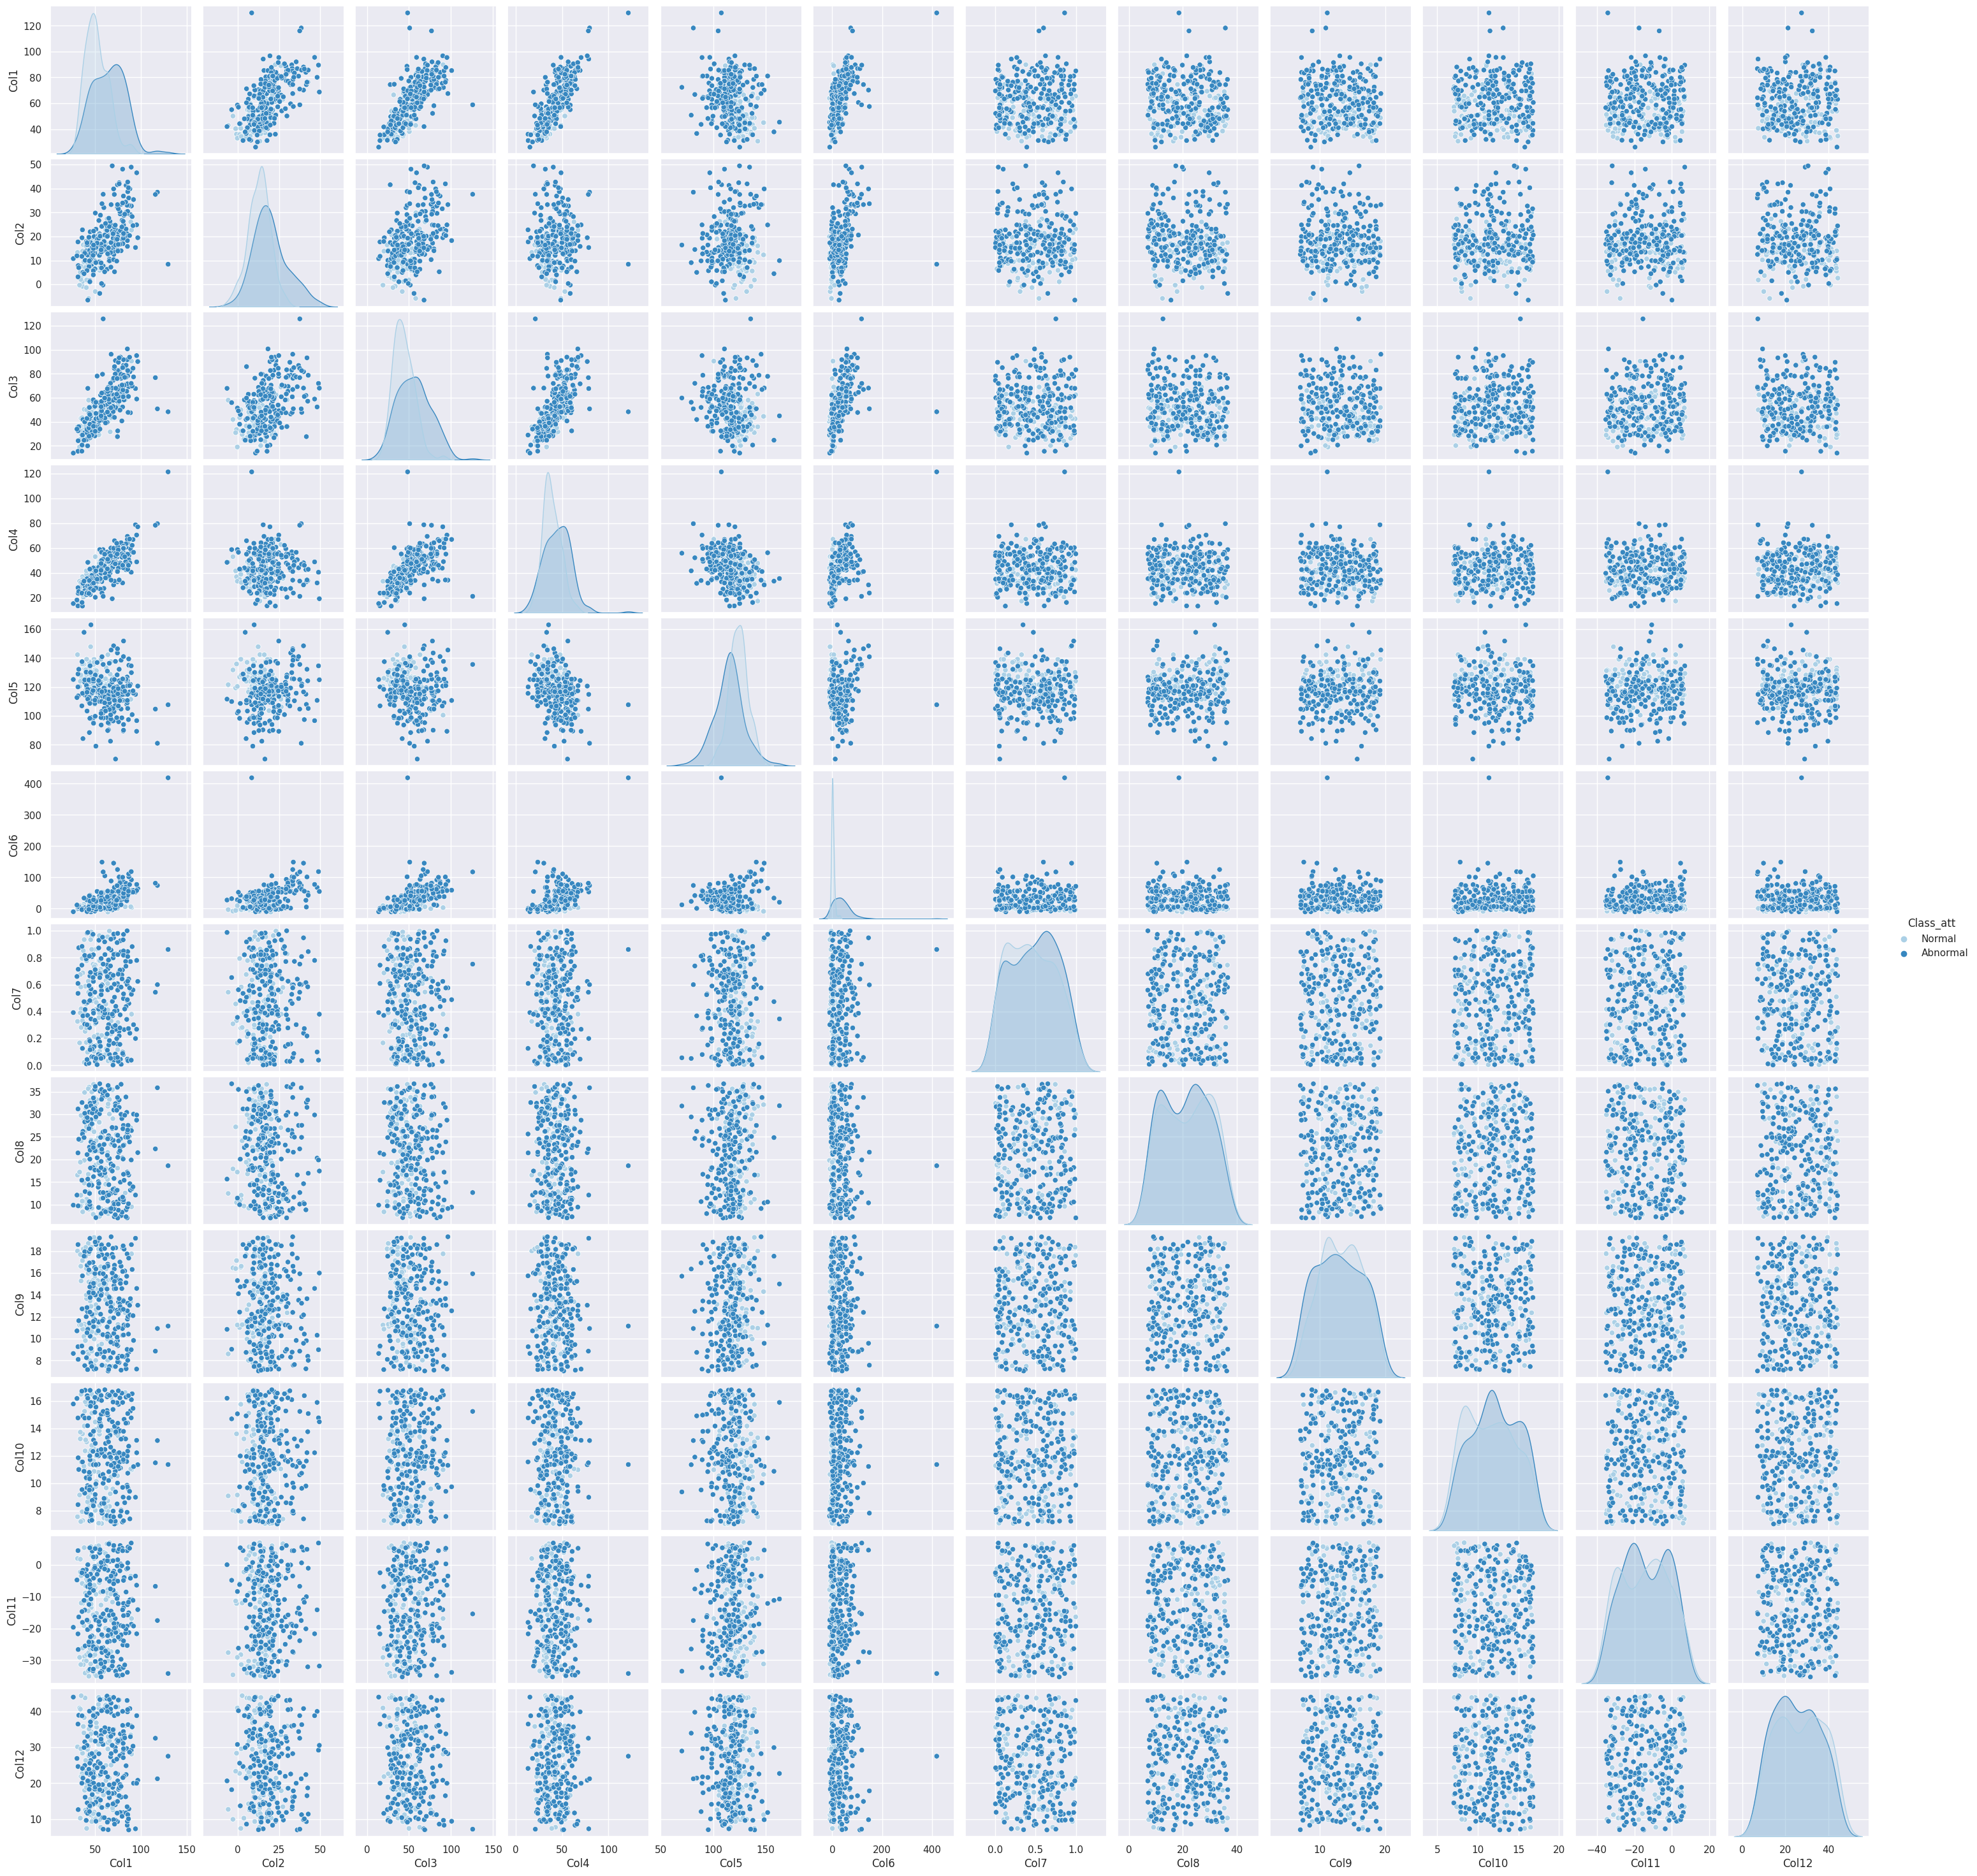

In [ ]:
sns.pairplot(df, hue='Class_att', palette='Blues')


Podemos observar que talvez pudessemos retirar algumas features com a intenção de melhorar o modelo. Isso porque variáveis podem ter alta correlação entre si (resultando em problemas de multicolinearidade), ou podem não ser explicativas o suficiente para a classificação.

Uma alternativa é utilizar um algoritmo de feature selection, mas iremos dar foco ao melhoramento através de otimização de hiperparâmetros.

# 🔋Melhorando o modelo: fine tuning
Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, e encontrar a combinação ideal deles pode ser considerado um desafio de busca. Atualmente, há diversos algoritmos de otimização disponíveis para essa tarefa, mas uma técnica simples é a GridSearch!

Para ajustar os hiperparâmetros no scikit-learn, pode-se utilizar o método GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperparâmetros dentre os fornecidos.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10),(20,), (100, 100, 100), (100,), (30, 40, 20), (50, 80, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

from sklearn.model_selection import GridSearchCV

*   hidden_layer_sizes: define o número de camadas e o número de nós que desejamos ter no classificador de rede neural. Assim, o comprimento da tupla denota o número total de camadas ocultas na rede.
*   activation: indica função de ativação para as camadas ocultas.
*   solver: especifica o algoritmo para otimização de peso entre os nós.
*   alpha: termo de regularização, ou termo de penalidade, que combate o overfitting restringindo o tamanho dos pesos
*   learning_rate: taxa de aprendizado para atualizações de peso



*   List item



In [ ]:
#import joblib
#clf_tuned = joblib.load('/content/drive/MyDrive/my_model_tuned.pkl')
clf_tuned = GridSearchCV(clf_default, parameter_space, n_jobs=-1, cv=5)
clf_tuned.fit(X, y)

Iteration 1, loss = 0.68711281
Iteration 2, loss = 0.55113188
Iteration 3, loss = 0.47674673
Iteration 4, loss = 0.43862514
Iteration 5, loss = 0.42397325
Iteration 6, loss = 0.39240656
Iteration 7, loss = 0.36831632
Iteration 8, loss = 0.35281802
Iteration 9, loss = 0.34344778
Iteration 10, loss = 0.33490440
Iteration 11, loss = 0.33430354
Iteration 12, loss = 0.32138818
Iteration 13, loss = 0.32131011
Iteration 14, loss = 0.31180418
Iteration 15, loss = 0.34006283
Iteration 16, loss = 0.31402451
Iteration 17, loss = 0.30323710
Iteration 18, loss = 0.29708665
Iteration 19, loss = 0.29644863
Iteration 20, loss = 0.29587860
Iteration 21, loss = 0.28739065
Iteration 22, loss = 0.30116984
Iteration 23, loss = 0.28258651
Iteration 24, loss = 0.28834125
Iteration 25, loss = 0.27791758
Iteration 26, loss = 0.27419657
Iteration 27, loss = 0.27345220
Iteration 28, loss = 0.28382199
Iteration 29, loss = 0.26872011
Iteration 30, loss = 0.26599872
Iteration 31, loss = 0.27511007
Iteration 32, los

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=13, verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,),
                                                (100, 100, 100), (100,),
                                                (30, 40, 20), (50, 80, 100)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

Exportando o modelo para não precisar treinar toda vez

In [ ]:
import joblib
joblib.dump(clf_tuned, 'my_model_tuned.pkl', compress=9)

['my_model_tuned.pkl']

# 🔎 Observando a melhor combinação de parâmetros encontrada

In [ ]:
print('Best parameters found:\n', clf_tuned.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


# 🏋️ Treinando...

In [ ]:
clf_tuned = clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

Iteration 1, loss = 0.69376821
Iteration 2, loss = 0.68905309
Iteration 3, loss = 0.68761753
Iteration 4, loss = 0.68540284
Iteration 5, loss = 0.68404592
Iteration 6, loss = 0.68050270
Iteration 7, loss = 0.67711650
Iteration 8, loss = 0.67431940
Iteration 9, loss = 0.67142540
Iteration 10, loss = 0.66535129
Iteration 11, loss = 0.65896313
Iteration 12, loss = 0.65109101
Iteration 13, loss = 0.64199363
Iteration 14, loss = 0.63070845
Iteration 15, loss = 0.61765165
Iteration 16, loss = 0.60303913
Iteration 17, loss = 0.58598752
Iteration 18, loss = 0.56818598
Iteration 19, loss = 0.54936102
Iteration 20, loss = 0.52946348
Iteration 21, loss = 0.50854871
Iteration 22, loss = 0.48818378
Iteration 23, loss = 0.47070432
Iteration 24, loss = 0.45412660
Iteration 25, loss = 0.44053736
Iteration 26, loss = 0.42777334
Iteration 27, loss = 0.41503701
Iteration 28, loss = 0.40411058
Iteration 29, loss = 0.39384213
Iteration 30, loss = 0.38385253
Iteration 31, loss = 0.37487078
Iteration 32, los

# 🤔 Analisando o Classification Report do modelo

In [ ]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cf_matrix_nb_tuned)

[[49  7]
 [ 8 59]]


<Axes: >

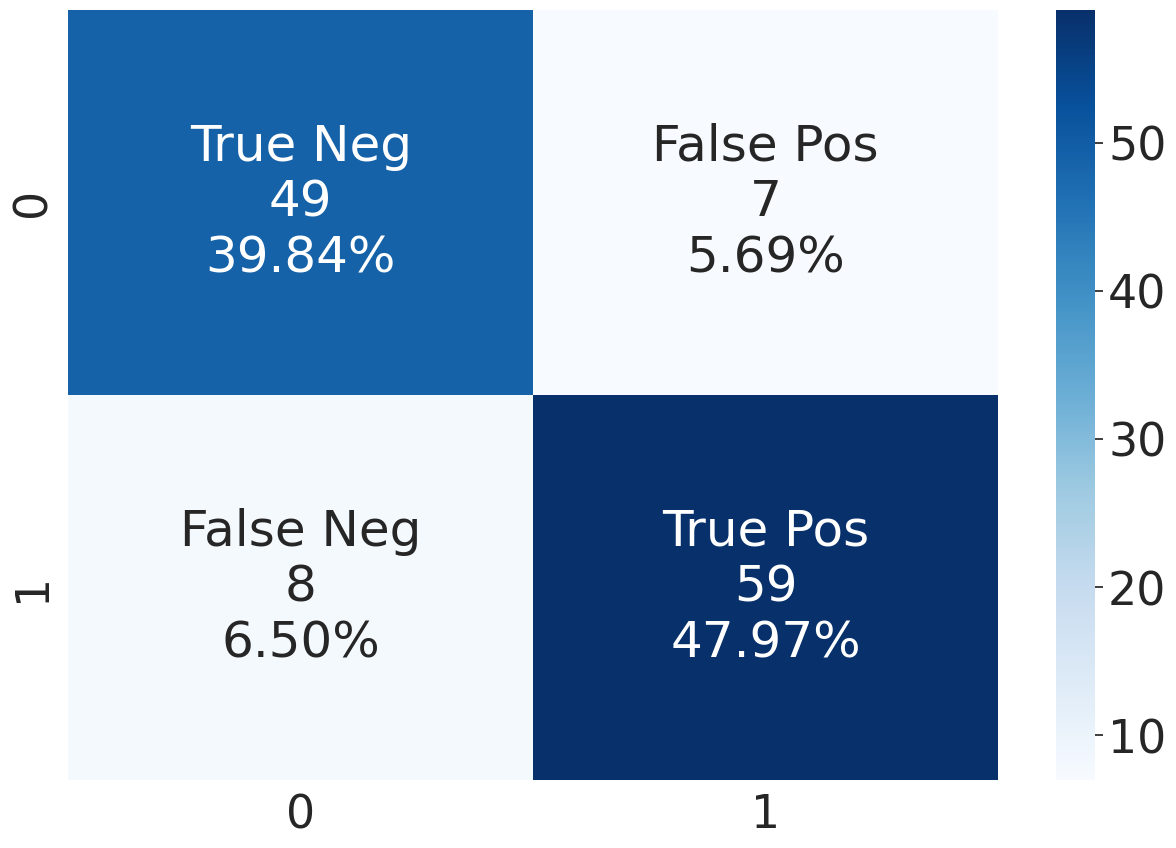

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_nb_tuned.flatten() / np.sum(cf_matrix_nb_tuned)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 3)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='Blues')

Comparando com o modelo sem fine-tuning, temos uma melhora nos casos de negativos marcados corretamente.

In [ ]:
clf_tuned.score(X_test, y_test)

0.8780487804878049

Conseguimos, tambem, melhorar o score de 84% para 87%.

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

clf_second_tuning = HalvingGridSearchCV(clf_default, parameter_space, random_state=0)

In [ ]:
clf_second_tuning.fit(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



HalvingGridSearchCV(estimator=MLPClassifier(random_state=13, verbose=True),
                    param_grid={'activation': ['identity', 'logistic', 'tanh',
                                               'relu'],
                                'alpha': [0.0001, 0.05],
                                'hidden_layer_sizes': [(10, 30, 10), (20,),
                                                       (100, 100, 100), (100,),
                                                       (30, 40, 20),
                                                       (50, 80, 100)],
                                'learning_rate': ['constant', 'adaptive',
                                                  'invscaling'],
                                'solver': ['sgd', 'adam', 'lbfgs']},
                    random_state=0)

In [ ]:
clf_second_tuning.score(X_test, y_test)

0.8699186991869918

In [ ]:
y_pred = clf_second_tuning.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    Abnormal       0.84      0.88      0.86        56
      Normal       0.89      0.87      0.88        67

    accuracy                           0.87       123
   macro avg       0.87      0.87      0.87       123
weighted avg       0.87      0.87      0.87       123

